学习R语言SVM。

# svm

In [2]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [ ]:
# 定义任务
tsk_iris <- tsk("iris")

# 定义学习期
lrn_svm <- lrn("classif.svm")

# 训练
lrn_svm$train(tsk_iris)

# 预测
pred_svm <- lrn_svm$predict(tsk_iris)

# 评估
pred_svm$score(msr("classif.acc"))

# classif.acc: 0.973333333333333

classif.acc 
  0.9733333

In [ ]:
lrn_svm$param_set %>%
  as.data.table() %>%
  select(1:5) %>%
  print()

# id    class lower upper                             levels
#              <char>   <char> <num> <num>                             <list>
#  1:       cachesize ParamDbl  -Inf   Inf                             [NULL]
#  2:   class.weights ParamUty    NA    NA                             [NULL]
#  3:           coef0 ParamDbl  -Inf   Inf                             [NULL]
#  4:            cost ParamDbl     0   Inf                             [NULL]
#  5:           cross ParamInt     0   Inf                             [NULL]
#  6: decision.values ParamLgl    NA    NA                         TRUE,FALSE
#  7:          degree ParamInt     1   Inf                             [NULL]
#  8:         epsilon ParamDbl     0   Inf                             [NULL]
#  9:          fitted ParamLgl    NA    NA                         TRUE,FALSE
# 10:           gamma ParamDbl     0   Inf                             [NULL]
# 11:          kernel ParamFct    NA    NA   linear,polynomial,radial,sigmoid
# 12:              nu ParamDbl  -Inf   Inf                             [NULL]
# 13:           scale ParamUty    NA    NA                             [NULL]
# 14:       shrinking ParamLgl    NA    NA                         TRUE,FALSE
# 15:       tolerance ParamDbl     0   Inf                             [NULL]
# 16:            type ParamFct    NA    NA C-classification,nu-classification

                 id    class lower upper                             levels
             <char>   <char> <num> <num>                             <list>
 1:       cachesize ParamDbl  -Inf   Inf                             [NULL]
 2:   class.weights ParamUty    NA    NA                             [NULL]
 3:           coef0 ParamDbl  -Inf   Inf                             [NULL]
 4:            cost ParamDbl     0   Inf                             [NULL]
 5:           cross ParamInt     0   Inf                             [NULL]
 6: decision.values ParamLgl    NA    NA                         TRUE,FALSE
 7:          degree ParamInt     1   Inf                             [NULL]
 8:         epsilon ParamDbl     0   Inf                             [NULL]
 9:          fitted ParamLgl    NA    NA                         TRUE,FALSE
10:           gamma ParamDbl     0   Inf                             [NULL]
11:          kernel ParamFct    NA    NA   linear,polynomial,radial,sigmoid
12:         

In [ ]:
# 查看参数空间
as.data.table(mlr_tuning_spaces) %>%
  filter(str_detect(key, "classif.svm")) %>%
  select(key, label) %>%
  print()

# Key: <key>
#                    key                             label
#                 <char>                            <char>
# 1: classif.svm.default   Classification SVM with Default
# 2:    classif.svm.rbv1 Classification SVM with RandomBot
# 3:    classif.svm.rbv2 Classification SVM with RandomBot

Key: <key>
                   key                             label
                <char>                            <char>
1: classif.svm.default   Classification SVM with Default
2:    classif.svm.rbv1 Classification SVM with RandomBot
3:    classif.svm.rbv2 Classification SVM with RandomBot


In [ ]:
lts_svm <- lts("classif.svm.default")
lts_svm

# <TuningSpace:classif.svm.default>: Classification SVM with Default
#        id lower upper levels logscale
#    <char> <num> <num> <list>   <lgcl>
# 1:   cost 1e-04 10000 [NULL]     TRUE
# 2: kernel    NA    NA [NULL]    FALSE
# 3: degree 2e+00     5 [NULL]    FALSE
# 4:  gamma 1e-04 10000 [NULL]     TRUE

<TuningSpace:classif.svm.default>: Classification SVM with Default
       id lower upper levels logscale
   <char> <num> <num> <list>   <lgcl>
1:   cost 1e-04 10000 [NULL]     TRUE
2: kernel    NA    NA [NULL]    FALSE
3: degree 2e+00     5 [NULL]    FALSE
4:  gamma 1e-04 10000 [NULL]     TRUE

In [13]:
lrn_svm

<LearnerClassifSVM:classif.svm>: Support Vector Machine
* Model: -
* Parameters: kernel=radial
* Packages: mlr3, mlr3learners, e1071
* Predict Types:  [response], prob
* Feature Types: logical, integer, numeric
* Properties: multiclass, twoclass

In [66]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_svm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.svm",
      kernel = "radial",
      type = "C-classification",
      id = "svm"
    )
)

# 定义参数空间
lts_svm <- ps(
  svm.cost = p_dbl(lower = 1e-4, upper = 1e4, logscale = TRUE),
  svm.gamma = p_dbl(lower = 1e-4, upper = 1e4, logscale = TRUE)
)

# 定义调优器
tnr <- tnr("grid_search", resolution = 5)

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  tuner = tnr,
  task = tsk_german,
  learner = lrn_svm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  search_space = lts_svm
)

INFO  [21:52:01.874] [bbotk] Starting to optimize 2 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [21:52:01.881] [bbotk] Evaluating 1 configuration(s)
INFO  [21:52:01.885] [mlr3] Running benchmark with 3 resampling iterations
INFO  [21:52:01.995] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.featureunion_robustify.imputeoor.fixfactors.imputesample.collapsefactors.encode.removeconstants_postrobustify.svm' on task 'german_credit' (iter 1/3)
INFO  [21:52:02.109] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.featureunion_robustify.imputeoor.fixfactors.imputesample.collapsefactors.encode.removeconstants_postrobustify.svm' on task 'german_credit' (iter 2/3)
INFO  [21:52:02.284] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.

In [ ]:
instance$result %>%
  select(svm.cost, svm.degree, svm.gamma, classif.acc) %>%
  print()

# svm.cost svm.degree svm.gamma classif.acc
#           <num>      <int>     <num>       <num>
# 1: 8.881784e-16          3  -4.60517   0.7460065

       svm.cost svm.degree svm.gamma classif.acc
          <num>      <int>     <num>       <num>
1: 8.881784e-16          3  -4.60517   0.7460065


In [ ]:
set.seed(123)

# 定义学习器
lrn_svm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.svm",
      kernel = "radial",
      type = "C-classification",
      id = "svm",
      predict_type = "prob"
    )
)

# 传入参数
lrn_svm$param_set$values <- instance$result_learner_param_vals

# 训练
lrn_svm$train(tsk_german)

# 预测
pred_svm <- lrn_svm$predict(tsk_german)

# 评估
pred_svm$score(msr("classif.acc"))

# classif.acc: 0.892

classif.acc 
      0.892

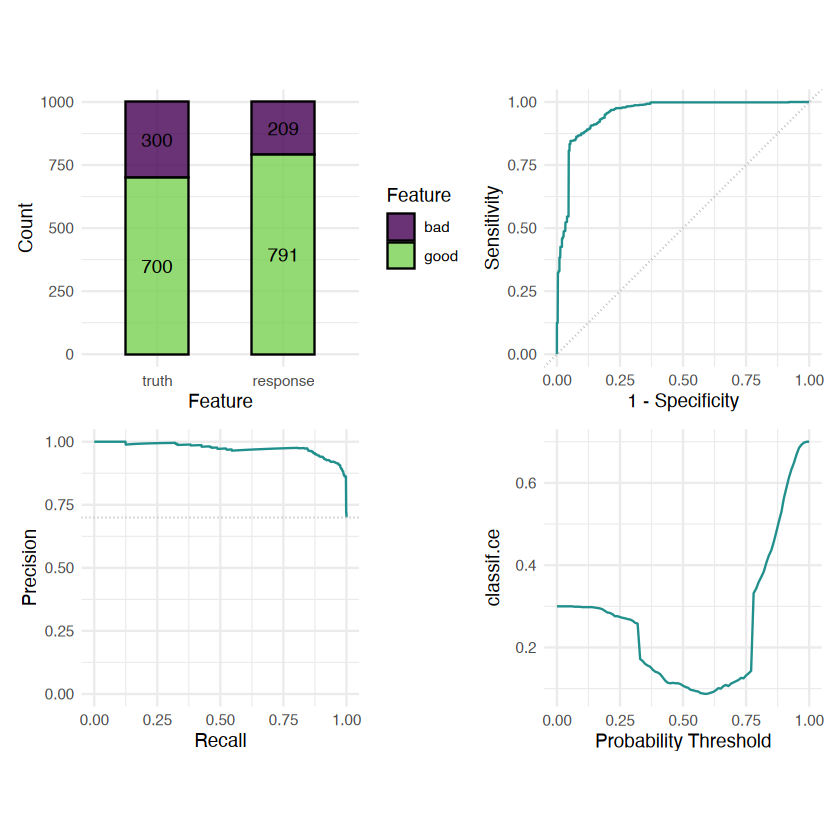

In [83]:
# 可视化结果
p_stack <- autoplot(pred_svm, type = "stacked")
p_roc <- autoplot(pred_svm, type = "roc")
p_prc <- autoplot(pred_svm, type = "prc")
p_thresh <- autoplot(pred_svm, type = "threshold")

# 拼图
library(patchwork)
p_stack + p_roc + p_prc + p_thresh +
  plot_layout(ncol = 2)

In [4]:
library(mlr3verse)
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# 定义任务
tsk_iris <- tsk("iris")

# 比较不同核的性能
lrn_svm_linear <- lrn(
  "classif.svm",
  kernel = "linear",
  type = "C-classification",
  id = "svm_linear"
)
lrn_svm_radial <- lrn(
  "classif.svm",
  kernel = "radial",
  type = "C-classification",
  id = "svm_radial"
)
lrn_svm_poly <- lrn(
  "classif.svm",
  kernel = "polynomial",
  type = "C-classification",
  id = "svm_poly"
)
lrn_svm_sigmoid <- lrn(
  "classif.svm",
  kernel = "sigmoid",
  type = "C-classification",
  id = "svm_sigmoid"
)

# 比较
design <- benchmark_grid(
  tasks = tsk_iris,
  learners = list(
    lrn_svm_linear, lrn_svm_radial, lrn_svm_poly, lrn_svm_sigmoid
  ),
  resamplings = rsmp("cv", folds = 3)
)
bmr <- benchmark(design)

# 评估结果
bmr$aggregate(msr("classif.acc")) %>%
  as.data.table() %>%
  select(learner_id, classif.acc) %>%
  print()

#     learner_id classif.acc
#         <char>       <num>
# 1:  svm_linear   0.9533333
# 2:  svm_radial   0.9533333
# 3:    svm_poly   0.9066667
# 4: svm_sigmoid   0.9066667

INFO  [08:28:59.727] [mlr3] Running benchmark with 12 resampling iterations
INFO  [08:28:59.734] [mlr3] Applying learner 'svm_linear' on task 'iris' (iter 1/3)
INFO  [08:28:59.742] [mlr3] Applying learner 'svm_linear' on task 'iris' (iter 2/3)
INFO  [08:28:59.748] [mlr3] Applying learner 'svm_linear' on task 'iris' (iter 3/3)
INFO  [08:28:59.754] [mlr3] Applying learner 'svm_radial' on task 'iris' (iter 1/3)
INFO  [08:28:59.768] [mlr3] Applying learner 'svm_radial' on task 'iris' (iter 2/3)
INFO  [08:28:59.775] [mlr3] Applying learner 'svm_radial' on task 'iris' (iter 3/3)
INFO  [08:28:59.782] [mlr3] Applying learner 'svm_poly' on task 'iris' (iter 1/3)
INFO  [08:28:59.788] [mlr3] Applying learner 'svm_poly' on task 'iris' (iter 2/3)
INFO  [08:28:59.794] [mlr3] Applying learner 'svm_poly' on task 'iris' (iter 3/3)
INFO  [08:28:59.800] [mlr3] Applying learner 'svm_sigmoid' on task 'iris' (iter 1/3)
INFO  [08:28:59.806] [mlr3] Applying learner 'svm_sigmoid' on task 'iris' (iter 2/3)
INFO

In [13]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_svm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.svm",
      type = "C-classification",
      id = "svm"
    )
)

# 定义参数空间
ps_svm <- ps(
  svm.kernel = p_fct(
    levels = c("linear", "polynomial", "radial", "sigmoid"),
    default = "radial"
  ),
  svm.cost = p_dbl(
    lower = 1e-4,
    upper = 1e4,
    logscale = TRUE
  ),
  svm.gamma = p_dbl(
    lower = 1e-4,
    upper = 1e4,
    logscale = TRUE,
    depends = (svm.kernel %in% c("radial", "sigmoid"))
  ),
  svm.degree = p_int(
    lower = 2,
    upper = 5,
    default = 3,
    depends = (svm.kernel == "polynomial")
  )
)

# 定义调优器
tnr <- tnr("grid_search", resolution = 3)  # 演示目的，小一点

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  tuner = tnr,
  task = tsk_german,
  learner = lrn_svm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  search_space = ps_svm
)

INFO  [08:40:39.503] [bbotk] Starting to optimize 4 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [08:40:39.512] [bbotk] Evaluating 1 configuration(s)
INFO  [08:40:39.517] [mlr3] Running benchmark with 3 resampling iterations
INFO  [08:40:39.954] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.featureunion_robustify.imputeoor.fixfactors.imputesample.collapsefactors.encode.removeconstants_postrobustify.svm' on task 'german_credit' (iter 1/3)
INFO  [08:40:40.352] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.featureunion_robustify.imputeoor.fixfactors.imputesample.collapsefactors.encode.removeconstants_postrobustify.svm' on task 'german_credit' (iter 2/3)
INFO  [08:40:40.736] [mlr3] Applying learner 'removeconstants_prerobustify.char_to_fct.POSIXct_to_dbl.ord_to_fct.imputehist.missind.impute_logicals.

In [ ]:
instance$result %>%
  select(svm.kernel, svm.cost, svm.degree, svm.gamma, classif.acc) %>%
  print()

# svm.kernel svm.cost svm.degree svm.gamma classif.acc
#        <char>    <num>      <int>     <num>       <num>
# 1:     radial  9.21034         NA  -9.21034   0.7460155

   svm.kernel svm.cost svm.degree svm.gamma classif.acc
       <char>    <num>      <int>     <num>       <num>
1:     radial  9.21034         NA  -9.21034   0.7460155


In [ ]:
# 传入参数
lrn_svm$param_set$values <- instance$result_learner_param_vals

# 训练
lrn_svm$train(tsk_german)

# 预测
pred_svm <- lrn_svm$predict(tsk_german)

# 评估
pred_svm$score(msr("classif.acc"))

# classif.acc: 0.906

classif.acc 
      0.906

In [ ]:
model_svm <- lrn_svm$model$svm
summary(model_svm)

# Length Class           Mode       
# model          30     svm             list       
# param_vals      4     -none-          list       
# log             3     data.table      list       
# train_time      1     -none-          numeric    
# task_hash       1     -none-          character  
# feature_names  71     -none-          character  
# validate        0     -none-          NULL       
# mlr3_version    1     package_version list       
# data_prototype 72     data.table      list       
# task_prototype 72     data.table      list       
# train_task     56     TaskClassif     environment

               Length Class           Mode       
model          30     svm             list       
param_vals      4     -none-          list       
log             3     data.table      list       
train_time      1     -none-          numeric    
task_hash       1     -none-          character  
feature_names  71     -none-          character  
validate        0     -none-          NULL       
mlr3_version    1     package_version list       
data_prototype 72     data.table      list       
task_prototype 72     data.table      list       
train_task     56     TaskClassif     environment

In [33]:
tsk_iris$head()

Species,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,1.4,0.2,5.1,3.5
setosa,1.4,0.2,4.9,3.0
setosa,1.3,0.2,4.7,3.2
setosa,1.5,0.2,4.6,3.1
setosa,1.4,0.2,5.0,3.6
setosa,1.7,0.4,5.4,3.9


# ksvm

In [ ]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_ksvm <- lrn("classif.ksvm")

# 训练
lrn_ksvm$train(tsk_german)

# 预测
pred_ksvm <- lrn_ksvm$predict(tsk_german)

# 评估
pred_ksvm$score(msr("classif.acc"))

# classif.acc: 0.838

classif.acc 
      0.838

In [ ]:
lrn_ksvm$param_set

# <ParamSet(14)>
# Key: <id>
#            id    class lower upper nlevels        default parents  value
#        <char>   <char> <num> <num>   <num>         <list>  <list> <list>
#  1:         C ParamDbl  -Inf   Inf     Inf              1    type [NULL]
#  2:     cache ParamInt     1   Inf     Inf             40  [NULL] [NULL]
#  3:   coupler ParamFct    NA    NA       2        minpair  [NULL] [NULL]
#  4:    degree ParamInt     1   Inf     Inf <NoDefault[0]>  kernel [NULL]
#  5:    kernel ParamFct    NA    NA       6         rbfdot  [NULL] [NULL]
#  6:        nu ParamDbl     0   Inf     Inf            0.2    type [NULL]
#  7:    offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
#  8:     order ParamInt  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
#  9:     scale ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 10:    scaled ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
# 11: shrinking ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
# 12:     sigma ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 13:       tol ParamDbl     0   Inf     Inf          0.001  [NULL] [NULL]
# 14:      type ParamFct    NA    NA       5          C-svc  [NULL] [NULL]

<ParamSet(14)>
Key: <id>
           id    class lower upper nlevels        default parents  value
       <char>   <char> <num> <num>   <num>         <list>  <list> <list>
 1:         C ParamDbl  -Inf   Inf     Inf              1    type [NULL]
 2:     cache ParamInt     1   Inf     Inf             40  [NULL] [NULL]
 3:   coupler ParamFct    NA    NA       2        minpair  [NULL] [NULL]
 4:    degree ParamInt     1   Inf     Inf <NoDefault[0]>  kernel [NULL]
 5:    kernel ParamFct    NA    NA       6         rbfdot  [NULL] [NULL]
 6:        nu ParamDbl     0   Inf     Inf            0.2    type [NULL]
 7:    offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
 8:     order ParamInt  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
 9:     scale ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
10:    scaled ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
11: shrinking ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
12:     sigma ParamDbl    

In [42]:
lrn_ksvm

<LearnerClassifKSVM:classif.ksvm>: Support Vector Machine
* Model: ksvm
* Parameters: list()
* Packages: mlr3, mlr3extralearners, kernlab
* Predict Types:  [response], prob
* Feature Types: logical, integer, numeric, character, factor, ordered
* Properties: multiclass, twoclass, weights

In [43]:
# 查看参数空间
as.data.table(mlr_tuning_spaces) %>%
  filter(str_detect(key, "classif.ksvm")) %>%
  select(key, label) %>%
  print()

Key: <key>
Empty data.table (0 rows and 2 cols): key,label


In [45]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_ksvm <- lrn("classif.ksvm")

# 定义搜索空间
ps_ksvm <- ps(
  kernel = p_fct(
    levels = c("rbfdot", "polydot", "vanilladot", "laplacedot", "besseldot"),
    default = "rbfdot"
  ),
  C = p_dbl(lower = 1e-4, upper = 1e4, logscale = TRUE),
  sigma = p_dbl(
    lower = 1e-4,
    upper = 1e4,
    logscale = TRUE,
    depends = (kernel %in% c("rbfdot", "laplacedot", "besseldot"))
  ),
  degree = p_int(
    lower = 2,
    upper = 5,
    default = 3,
    depends = (kernel == "polydot")
  ),
  scale = p_dbl(
    lower = 0,
    upper = 1,
    default = 1,
    depends = (kernel %in% c("polydot", "vanilladot"))
  ),
  order = p_int(
    lower = 1,
    upper = 3,
    default = 2,
    depends = (kernel == "besseldot")
  )
)

# 定义调优器
tnr <- tnr("grid_search", resolution = 3)  # 演示目的，小一点

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  tuner = tnr,
  task = tsk_german,
  learner = lrn_ksvm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  search_space = ps_ksvm
)

INFO  [09:35:26.909] [bbotk] Starting to optimize 6 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [09:35:26.924] [bbotk] Evaluating 1 configuration(s)
INFO  [09:35:26.931] [mlr3] Running benchmark with 3 resampling iterations
INFO  [09:35:27.130] [mlr3] Applying learner 'classif.ksvm' on task 'german_credit' (iter 1/3)
INFO  [09:35:27.280] [mlr3] Applying learner 'classif.ksvm' on task 'german_credit' (iter 2/3)
INFO  [09:35:27.499] [mlr3] Applying learner 'classif.ksvm' on task 'german_credit' (iter 3/3)
INFO  [09:35:27.879] [mlr3] Finished benchmark
INFO  [09:35:27.935] [bbotk] Result of batch 1:
INFO  [09:35:27.938] [bbotk]   kernel        C sigma degree scale order classif.acc warnings errors
INFO  [09:35:27.938] [bbotk]  polydot -9.21034    NA      5     0    NA   0.7000204        0      0
INFO  [09:35:27.938] [bbotk]  runtime_learners                                uhash
INFO  [09:35:27.938] [bbotk]             0.383 7e48d071-00a2-48bf-850f-4565c20dd

In [ ]:
instance$result %>%
  select(kernel, C, degree, sigma, scale, order, classif.acc) %>%
  print()

# kernel            C degree        sigma scale order classif.acc
#       <char>        <num>  <int>        <num> <num> <int>       <num>
# 1: besseldot 8.881784e-16     NA 8.881784e-16    NA     2   0.7510145

      kernel            C degree        sigma scale order classif.acc
      <char>        <num>  <int>        <num> <num> <int>       <num>
1: besseldot 8.881784e-16     NA 8.881784e-16    NA     2   0.7510145


In [48]:
# 插入参数
lrn_ksvm$param_set$values <- c(
  instance$result_learner_param_vals,
  type = "C-svc"  # 设置类型
)

# 训练
lrn_ksvm$train(tsk_german)

# 预测
pred_ksvm <- lrn_ksvm$predict(tsk_german)

# 评估
pred_ksvm$score(msr("classif.acc"))

classif.acc 
      0.864

# lssvm

In [52]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_lssvm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.lssvm",
      id = "lssvm"
    )
)

# 训练
lrn_lssvm$train(tsk_german)

# 预测
pred_lssvm <- lrn_lssvm$predict(tsk_german)

# 评估
pred_lssvm$score(msr("classif.acc"))

# classif.acc: 0.764

Using automatic sigma estimation (sigest) for RBF or laplace kernel 


classif.acc 
      0.763

In [ ]:
lrn_lssvm$pipeops$lssvm$param_set

# <ParamSet(19)>
#             id    class lower upper nlevels        default  value
#         <char>   <char> <num> <num>   <num>         <list> <list>
#  1:     scaled ParamUty    NA    NA     Inf           TRUE [NULL]
#  2:     kernel ParamFct    NA    NA       9         rbfdot [NULL]
#  3:      sigma ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
#  4:     degree ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
#  5:      scale ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
#  6:     offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
#  7:      order ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
#  8:     length ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
#  9:     lambda ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
# 10: normalized ParamLgl    NA    NA       2 <NoDefault[0]> [NULL]
# 11:       kpar ParamUty    NA    NA     Inf      automatic [NULL]
# 12:        tau ParamDbl  -Inf   Inf     Inf           0.01 [NULL]
# 13:    reduced ParamLgl    NA    NA       2           TRUE [NULL]
# 14:       rank ParamInt  -Inf   Inf     Inf <NoDefault[0]> [NULL]
# 15:      delta ParamInt  -Inf   Inf     Inf             40 [NULL]
# 16:        tol ParamDbl  -Inf   Inf     Inf          1e-04 [NULL]
# 17:        fit ParamLgl    NA    NA       2           TRUE [NULL]
# 18:  na.action ParamUty    NA    NA     Inf  <function[1]> [NULL]
# 19:    coupler ParamFct    NA    NA       2        minpair [NULL]

<ParamSet(19)>
            id    class lower upper nlevels        default  value
        <char>   <char> <num> <num>   <num>         <list> <list>
 1:     scaled ParamUty    NA    NA     Inf           TRUE [NULL]
 2:     kernel ParamFct    NA    NA       9         rbfdot [NULL]
 3:      sigma ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
 4:     degree ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
 5:      scale ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
 6:     offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
 7:      order ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
 8:     length ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
 9:     lambda ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
10: normalized ParamLgl    NA    NA       2 <NoDefault[0]> [NULL]
11:       kpar ParamUty    NA    NA     Inf      automatic [NULL]
12:        tau ParamDbl  -Inf   Inf     Inf           0.01 [NULL]
13:    reduced ParamLgl    NA    NA       2           TRUE [N

In [ ]:
# 比较svm和lssvm的速度
lrn_svm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.svm",
      kernel = "radial",
      type = "C-classification",
      id = "svm"
    )
)
lrn_svm$id <- "svm"

lrn_lssvm <- as_learner(
  ppl("robustify") %>>%
    lrn(
      "classif.lssvm",
      id = "lssvm"
    )
)
lrn_lssvm$id <- "lssvm"

# 定义任务
tsk_german <- tsk("german_credit")

# 定义比较设计
design <- benchmark_grid(
  tasks = tsk_german,
  learners = list(lrn_svm, lrn_lssvm),
  resamplings = rsmp("cv", folds = 3)
)

# 执行比较
bmr <- benchmark(design)

# 评估结果，比较速度
bmr$aggregate(msrs(c("classif.acc", "time_train", "time_predict"))) %>%
  as.data.table() %>%
  select(learner_id, classif.acc, time_train, time_predict) %>%
  print()

#    learner_id classif.acc time_train time_predict
#        <char>       <num>      <num>        <num>
# 1:        svm   0.7399825  0.4980000    0.3010000
# 2:      lssvm   0.7370005  0.7383333    0.1953333

INFO  [10:02:31.799] [mlr3] Running benchmark with 6 resampling iterations
INFO  [10:02:31.942] [mlr3] Applying learner 'svm' on task 'german_credit' (iter 1/3)
INFO  [10:02:32.107] [mlr3] Applying learner 'svm' on task 'german_credit' (iter 2/3)
INFO  [10:02:32.321] [mlr3] Applying learner 'svm' on task 'german_credit' (iter 3/3)
INFO  [10:02:32.510] [mlr3] Applying learner 'lssvm' on task 'german_credit' (iter 1/3)
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
INFO  [10:02:32.683] [mlr3] Applying learner 'lssvm' on task 'german_credit' (iter 2/3)
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
INFO  [10:02:32.920] [mlr3] Applying learner 'lssvm' on task 'german_credit' (iter 3/3)
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
INFO  [10:02:33.783] [mlr3] Finished benchmark
   learner_id classif.acc time_train time_predict
       <char>       <num>      <num>        <num>
1:        svm   0.7399825  0.4980000    0.3010000

# smo

In [ ]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_smo <- lrn("classif.smo")

# 训练
lrn_smo$train(tsk_german)

# 预测
pred_smo <- lrn_smo$predict(tsk_german)

# 评估
pred_smo$score(msr("classif.acc"))

# classif.acc: 0.787

classif.acc 
      0.787

In [ ]:
lrn_smo$param_set %>%
  as.data.table() %>%
  select(1:4) %>%
  print()

# id    class lower upper
#                        <char>   <char> <num> <num>
#  1:                    subset ParamUty    NA    NA
#  2:                 na.action ParamUty    NA    NA
#  3:                 no_checks ParamLgl    NA    NA
#  4:                         C ParamDbl  -Inf   Inf
#  5:                         N ParamFct    NA    NA
#  6:                         L ParamDbl  -Inf   Inf
#  7:                         P ParamDbl  -Inf   Inf
#  8:                         M ParamLgl    NA    NA
#  9:                         V ParamInt  -Inf   Inf
# 10:                         W ParamInt  -Inf   Inf
# 11:                         K ParamFct    NA    NA
# 12:                calibrator ParamUty    NA    NA
# 13:                    E_poly ParamDbl  -Inf   Inf
# 14:                    L_poly ParamLgl    NA    NA
# 15:                    C_poly ParamInt  -Inf   Inf
# 16:                C_logistic ParamLgl    NA    NA
# 17:                R_logistic ParamDbl  -Inf   Inf
# 18:                M_logistic ParamInt  -Inf   Inf
# 19:         output_debug_info ParamLgl    NA    NA
# 20: do_not_check_capabilities ParamLgl    NA    NA
# 21:        num_decimal_places ParamInt     1   Inf
# 22:                batch_size ParamInt     1   Inf
# 23:                   options ParamUty    NA    NA
#                            id    class lower upper

                           id    class lower upper
                       <char>   <char> <num> <num>
 1:                    subset ParamUty    NA    NA
 2:                 na.action ParamUty    NA    NA
 3:                 no_checks ParamLgl    NA    NA
 4:                         C ParamDbl  -Inf   Inf
 5:                         N ParamFct    NA    NA
 6:                         L ParamDbl  -Inf   Inf
 7:                         P ParamDbl  -Inf   Inf
 8:                         M ParamLgl    NA    NA
 9:                         V ParamInt  -Inf   Inf
10:                         W ParamInt  -Inf   Inf
11:                         K ParamFct    NA    NA
12:                calibrator ParamUty    NA    NA
13:                    E_poly ParamDbl  -Inf   Inf
14:                    L_poly ParamLgl    NA    NA
15:                    C_poly ParamInt  -Inf   Inf
16:                C_logistic ParamLgl    NA    NA
17:                R_logistic ParamDbl  -Inf   Inf
18:                M_logistic P

# svr

In [67]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_svm <- lrn("regr.svm")

# 训练
lrn_svm$train(tsk_mtcars)

# 预测
pred_svm <- lrn_svm$predict(tsk_mtcars)

# 评估
pred_svm$score(msrs(c("regr.rmse", "regr.rsq")))

regr.rmse       rsq 
2.1247002 0.8717112

In [ ]:
lrn_svm$param_set

# <ParamSet(14)>
# Key: <id>
#            id    class lower upper nlevels        default parents  value
#        <char>   <char> <num> <num>   <num>         <list>  <list> <list>
#  1: cachesize ParamDbl  -Inf   Inf     Inf             40  [NULL] [NULL]
#  2:     coef0 ParamDbl  -Inf   Inf     Inf              0  kernel [NULL]
#  3:      cost ParamDbl     0   Inf     Inf              1    type [NULL]
#  4:     cross ParamInt     0   Inf     Inf              0  [NULL] [NULL]
#  5:    degree ParamInt     1   Inf     Inf              3  kernel [NULL]
#  6:   epsilon ParamDbl     0   Inf     Inf            0.1    type [NULL]
#  7:    fitted ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
#  8:     gamma ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
#  9:    kernel ParamFct    NA    NA       4         radial  [NULL] [NULL]
# 10:        nu ParamDbl  -Inf   Inf     Inf            0.5    type [NULL]
# 11:     scale ParamUty    NA    NA     Inf           TRUE  [NULL] [NULL]
# 12: shrinking ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
# 13: tolerance ParamDbl     0   Inf     Inf          0.001  [NULL] [NULL]
# 14:      type ParamFct    NA    NA       2 eps-regression  [NULL] [NULL]

<ParamSet(14)>
Key: <id>
           id    class lower upper nlevels        default parents  value
       <char>   <char> <num> <num>   <num>         <list>  <list> <list>
 1: cachesize ParamDbl  -Inf   Inf     Inf             40  [NULL] [NULL]
 2:     coef0 ParamDbl  -Inf   Inf     Inf              0  kernel [NULL]
 3:      cost ParamDbl     0   Inf     Inf              1    type [NULL]
 4:     cross ParamInt     0   Inf     Inf              0  [NULL] [NULL]
 5:    degree ParamInt     1   Inf     Inf              3  kernel [NULL]
 6:   epsilon ParamDbl     0   Inf     Inf            0.1    type [NULL]
 7:    fitted ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
 8:     gamma ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
 9:    kernel ParamFct    NA    NA       4         radial  [NULL] [NULL]
10:        nu ParamDbl  -Inf   Inf     Inf            0.5    type [NULL]
11:     scale ParamUty    NA    NA     Inf           TRUE  [NULL] [NULL]
12: shrinking ParamLgl    

In [69]:
lrn_svm <- lrn("regr.svm", type = "")

ERROR: Error in self$assert(xs, sanitize = TRUE): Assertion on 'xs' failed: type: Must be element of set {'eps-regression','nu-regression'}, but is ''.


In [83]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_svm <- lrn("regr.svm", type = "eps-regression", id = "svm")

# 定义参数空间
ps_svm <- ps(
  kernel = p_fct(
    levels = c("linear", "polynomial", "radial", "sigmoid"),
    default = "radial"
  ),
  cost = p_dbl(lower = 1e-4, upper = 1e4, logscale = TRUE),
  gamma = p_dbl(
    lower = 1e-4,
    upper = 1e4,
    logscale = TRUE,
    depends = (kernel %in% c("radial", "sigmoid"))
  ),
  degree = p_int(
    lower = 2,
    upper = 5,
    default = 3,
    depends = (kernel == "polynomial")
  ),
  epsilon = p_dbl(
    lower = 0,
    upper = 1,
    default = 0.1,
    depends = (kernel %in% c("linear", "polynomial", "radial", "sigmoid"))
  )
)

# 定义调优器
tnr <- tnr("grid_search", resolution = 3)  # 演示目的，小一点

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  tuner = tnr,
  task = tsk_mtcars,
  learner = lrn_svm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("regr.rmse"),
  search_space = ps_svm
)

INFO  [11:01:23.932] [bbotk] Starting to optimize 5 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [11:01:23.978] [bbotk] Evaluating 1 configuration(s)
INFO  [11:01:23.990] [mlr3] Running benchmark with 3 resampling iterations
INFO  [11:01:24.174] [mlr3] Applying learner 'svm' on task 'mtcars' (iter 1/3)
INFO  [11:01:24.323] [mlr3] Applying learner 'svm' on task 'mtcars' (iter 2/3)
INFO  [11:01:24.429] [mlr3] Applying learner 'svm' on task 'mtcars' (iter 3/3)
INFO  [11:01:24.453] [mlr3] Finished benchmark
INFO  [11:01:24.469] [bbotk] Result of batch 1:
INFO  [11:01:24.471] [bbotk]   kernel     cost   gamma degree epsilon regr.rmse warnings errors
INFO  [11:01:24.471] [bbotk]  sigmoid -9.21034 9.21034     NA       1   6.15804        0      0
INFO  [11:01:24.471] [bbotk]  runtime_learners                                uhash
INFO  [11:01:24.471] [bbotk]             0.023 17888b92-d6e7-4937-aa1b-d65d8c430f24
INFO  [11:01:24.473] [bbotk] Evaluating 1 configurat

In [ ]:
instance$result %>%
  select(
    kernel,
    cost,
    degree,
    gamma,
    epsilon,
    regr.rmse
  ) %>%
  print()

# kernel    cost degree    gamma epsilon regr.rmse
#    <char>   <num>  <int>    <num>   <num>     <num>
# 1: radial 9.21034     NA -9.21034     0.5  3.598737

   kernel    cost degree    gamma epsilon regr.rmse
   <char>   <num>  <int>    <num>   <num>     <num>
1: radial 9.21034     NA -9.21034     0.5  3.598737


In [86]:
instance$result_learner_param_vals

$type
[1] "eps-regression"

$kernel
[1] "radial"

$cost
[1] 10000

$gamma
[1] 1e-04

$epsilon
[1] 0.5

In [88]:
# 传入参数
lrn_svm$param_set$values <- instance$result_learner_param_vals

# 训练
lrn_svm$train(tsk_mtcars)

# 预测
pred_svm <- lrn_svm$predict(tsk_mtcars)

# 评估
pred_svm$score(msrs(c("regr.rmse", "regr.rsq")))

regr.rmse       rsq 
2.3439032 0.8438749

In [90]:
autoplot(pred_svm, type = "")

ERROR: Error in autoplot.PredictionRegr(pred_svm, type = ""): Assertion on 'type' failed: Must be element of set {'xy','histogram','residual','confidence'}, but is ''.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


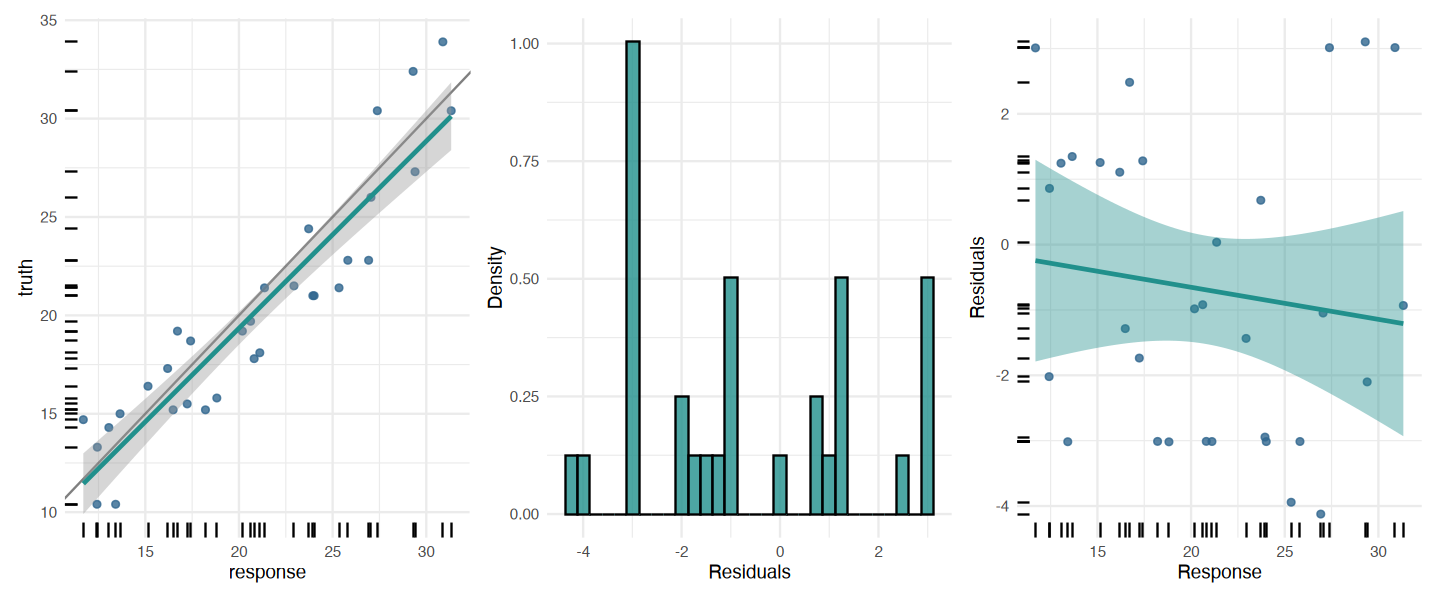

In [95]:
p_xy <- autoplot(pred_svm, type = "xy")
p_hist <- autoplot(pred_svm, type = "histogram")
p_residual <- autoplot(pred_svm, type = "residual")

library(patchwork)
# 调整画布大小
options(repr.plot.width = 12, repr.plot.height = 5)
p_xy + p_hist + p_residual +
  plot_layout(ncol = 3)

# ksvr

In [99]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_ksvm <- lrn("regr.ksvm")

# 训练
lrn_ksvm$train(tsk_mtcars)

# 预测
pred_ksvm <- lrn_ksvm$predict(tsk_mtcars)

# 评估
pred_ksvm$score(msrs(c("regr.rmse", "regr.rsq")))

regr.rmse       rsq 
1.4686473 0.9387045

In [ ]:
lrn_ksvm$param_set

# <ParamSet(16)>
# Key: <id>
#            id    class lower upper nlevels        default parents  value
#        <char>   <char> <num> <num>   <num>         <list>  <list> <list>
#  1:         C ParamDbl  -Inf   Inf     Inf              1  [NULL] [NULL]
#  2:     cache ParamInt     1   Inf     Inf             40  [NULL] [NULL]
#  3:    degree ParamInt     1   Inf     Inf <NoDefault[0]>  kernel [NULL]
#  4:   epsilon ParamDbl  -Inf   Inf     Inf            0.1  [NULL] [NULL]
#  5:       fit ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
#  6:    kernel ParamFct    NA    NA       6         rbfdot  [NULL] [NULL]
#  7: na.action ParamUty    NA    NA     Inf  <function[1]>  [NULL] [NULL]
#  8:        nu ParamDbl     0   Inf     Inf            0.2  [NULL] [NULL]
#  9:    offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 10:     order ParamInt  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 11:     scale ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 12:    scaled ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
# 13: shrinking ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
# 14:     sigma ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
# 15:       tol ParamDbl     0   Inf     Inf          0.001  [NULL] [NULL]
# 16:      type ParamFct    NA    NA       3        eps-svr  [NULL] [NULL]

<ParamSet(16)>
Key: <id>
           id    class lower upper nlevels        default parents  value
       <char>   <char> <num> <num>   <num>         <list>  <list> <list>
 1:         C ParamDbl  -Inf   Inf     Inf              1  [NULL] [NULL]
 2:     cache ParamInt     1   Inf     Inf             40  [NULL] [NULL]
 3:    degree ParamInt     1   Inf     Inf <NoDefault[0]>  kernel [NULL]
 4:   epsilon ParamDbl  -Inf   Inf     Inf            0.1  [NULL] [NULL]
 5:       fit ParamLgl    NA    NA       2           TRUE  [NULL] [NULL]
 6:    kernel ParamFct    NA    NA       6         rbfdot  [NULL] [NULL]
 7: na.action ParamUty    NA    NA     Inf  <function[1]>  [NULL] [NULL]
 8:        nu ParamDbl     0   Inf     Inf            0.2  [NULL] [NULL]
 9:    offset ParamDbl  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
10:     order ParamInt  -Inf   Inf     Inf <NoDefault[0]>  kernel [NULL]
11:     scale ParamDbl     0   Inf     Inf <NoDefault[0]>  kernel [NULL]
12:    scaled ParamLgl    

In [101]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_ksvm <- lrn("regr.ksvm")

# 定义参数空间
ps_ksvm <- ps(
  kernel = p_fct(
    levels = c("rbfdot", "polydot", "vanilladot", "laplacedot", "besseldot"),
    default = "rbfdot"
  ),
  C = p_dbl(lower = 1e-4, upper = 1e4, logscale = TRUE),
  sigma = p_dbl(
    lower = 1e-4,
    upper = 1e4,
    logscale = TRUE,
    depends = (kernel %in% c("rbfdot", "laplacedot", "besseldot"))
  ),
  degree = p_int(
    lower = 2,
    upper = 5,
    default = 3,
    depends = (kernel == "polydot")
  ),
  scale = p_dbl(
    lower = 0,
    upper = 1,
    default = 1,
    depends = (kernel %in% c("polydot", "vanilladot"))
  ),
  order = p_int(
    lower = 1,
    upper = 3,
    default = 2,
    depends = (kernel == "besseldot")
  )
)

# 定义调优器
tnr <- tnr("grid_search", resolution = 3)  # 演示目的，小一点

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  tuner = tnr,
  task = tsk_mtcars,
  learner = lrn_ksvm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("regr.rmse"),
  search_space = ps_ksvm
)

INFO  [11:28:03.843] [bbotk] Starting to optimize 6 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [11:28:03.861] [bbotk] Evaluating 1 configuration(s)
INFO  [11:28:03.868] [mlr3] Running benchmark with 3 resampling iterations
INFO  [11:28:03.985] [mlr3] Applying learner 'regr.ksvm' on task 'mtcars' (iter 1/3)
INFO  [11:28:04.101] [mlr3] Applying learner 'regr.ksvm' on task 'mtcars' (iter 2/3)
INFO  [11:28:04.329] [mlr3] Applying learner 'regr.ksvm' on task 'mtcars' (iter 3/3)
INFO  [11:28:04.640] [mlr3] Finished benchmark
INFO  [11:28:04.664] [bbotk] Result of batch 1:
INFO  [11:28:04.666] [bbotk]   kernel       C sigma degree scale order regr.rmse warnings errors runtime_learners                                uhash
INFO  [11:28:04.666] [bbotk]  polydot 9.21034    NA      2   0.5    NA  6.960683        0      0            0.232 21e93f31-1c45-4377-9e01-93f9edeffdf9
INFO  [11:28:04.668] [bbotk] Evaluating 1 configuration(s)
INFO  [11:28:04.677] [mlr3] Runni

In [ ]:
instance$result %>%
  select(kernel, C, sigma, regr.rmse) %>%
  print()

# kernel       C    sigma regr.rmse
#        <char>   <num>    <num>     <num>
# 1: laplacedot 9.21034 -9.21034   2.64875

       kernel       C    sigma regr.rmse
       <char>   <num>    <num>     <num>
1: laplacedot 9.21034 -9.21034   2.64875


In [107]:
# 传入参数
lrn_ksvm$param_set$values <- instance$result_learner_param_vals

# 训练
lrn_ksvm$train(tsk_mtcars)

# 预测
pred_ksvm <- lrn_ksvm$predict(tsk_mtcars)

# 评估
pred_ksvm$score(msrs(c("regr.rmse", "regr.rsq")))

regr.rmse       rsq 
0.5666280 0.9908759

# smor

In [108]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_smo <- lrn("regr.smo_reg")

# 训练
lrn_smo$train(tsk_mtcars)

# 预测
pred_smo <- lrn_smo$predict(tsk_mtcars)

# 评估
pred_smo$score(msrs(c("regr.rmse", "regr.rsq")))

regr.rmse       rsq 
2.3281287 0.8459693

In [ ]:
lrn_smo$param_set

# <ParamSet(19)>
# Key: <id>
#                            id    class lower upper nlevels        default parents  value
#                        <char>   <char> <num> <num>   <num>         <list>  <list> <list>
#  1:                         C ParamDbl  -Inf   Inf     Inf              1  [NULL] [NULL]
#  2:                    C_poly ParamInt  -Inf   Inf     Inf         250007       K [NULL]
#  3:                    E_poly ParamDbl  -Inf   Inf     Inf              1       K [NULL]
#  4:                         I ParamFct    NA    NA       2 RegSMOImproved  [NULL] [NULL]
#  5:                         K ParamFct    NA    NA       5     PolyKernel  [NULL] [NULL]
#  6:                L_improved ParamDbl  -Inf   Inf     Inf          0.001       I [NULL]
#  7:                    L_poly ParamLgl    NA    NA       2          FALSE       K [NULL]
#  8:                         N ParamFct    NA    NA       3              0  [NULL] [NULL]
#  9:                P_improved ParamDbl  -Inf   Inf     Inf          1e-12       I [NULL]
# 10:                T_improved ParamDbl  -Inf   Inf     Inf          0.001       I [NULL]
# 11:                V_improved ParamLgl    NA    NA       2           TRUE       I [NULL]
# 12:                W_improved ParamInt  -Inf   Inf     Inf              1       I [NULL]
# 13:                batch_size ParamInt     1   Inf     Inf            100  [NULL] [NULL]
# 14: do_not_check_capabilities ParamLgl    NA    NA       2          FALSE  [NULL] [NULL]
# 15:                 na.action ParamUty    NA    NA     Inf <NoDefault[0]>  [NULL] [NULL]
# 16:        num_decimal_places ParamInt     1   Inf     Inf              2  [NULL] [NULL]
# 17:                   options ParamUty    NA    NA     Inf         [NULL]  [NULL] [NULL]
# 18:         output_debug_info ParamLgl    NA    NA       2          FALSE  [NULL] [NULL]
# 19:                    subset ParamUty    NA    NA     Inf <NoDefault[0]>  [NULL] [NULL]

<ParamSet(19)>
Key: <id>
                           id    class lower upper nlevels        default parents  value
                       <char>   <char> <num> <num>   <num>         <list>  <list> <list>
 1:                         C ParamDbl  -Inf   Inf     Inf              1  [NULL] [NULL]
 2:                    C_poly ParamInt  -Inf   Inf     Inf         250007       K [NULL]
 3:                    E_poly ParamDbl  -Inf   Inf     Inf              1       K [NULL]
 4:                         I ParamFct    NA    NA       2 RegSMOImproved  [NULL] [NULL]
 5:                         K ParamFct    NA    NA       5     PolyKernel  [NULL] [NULL]
 6:                L_improved ParamDbl  -Inf   Inf     Inf          0.001       I [NULL]
 7:                    L_poly ParamLgl    NA    NA       2          FALSE       K [NULL]
 8:                         N ParamFct    NA    NA       3              0  [NULL] [NULL]
 9:                P_improved ParamDbl  -Inf   Inf     Inf          1e-12       I [NU